In [37]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import csv
import datetime as dt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [54]:
from network_analyze.utils import dateparse

DATA_DIR = Path('DATA')
dfile = DATA_DIR / 'Wednesday-workingHours.pcap_ISCX.csv'
#dfile = DATA_DIR/'Tuesday-WorkingHours.pcap_ISCX.csv'
df = pd.read_csv(dfile, index_col=False, parse_dates=[' Timestamp'], date_parser=dateparse)
df = df.rename(columns=lambda x: x.strip())
#df = df[(df['Timestamp']> dt.datetime(2017,7,5,10)) & (df['Timestamp'] < dt.datetime(2017,7,5,12))]
#df[df.Label=='DoS slowloris'] 2017-07-05 09:48:00
df = df[(df['Timestamp'] > dt.datetime(2017, 7, 5, 9, 30)) & (df['Timestamp'] < dt.datetime(2017, 7, 5, 10, 30))]

In [55]:
for f in os.listdir(DATA_DIR):
    print(f)
    if f == 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv':
        print('omijam')
        continue

    pd.read_csv(DATA_DIR/f)

Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


KeyboardInterrupt: 

In [ ]:
QUANT_COLS =['Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',   'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward','Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
#na razie pomijam wartosci nan i inf
COLS = QUANT_COLS + ['Label']
df = df[COLS]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
df = df.dropna()
#df = df[df['Label'] != 'BENIGN']
M = df.to_numpy()
Labels = M[:, -1]
M = M[:, :-1]
M_train, M_test, Labels_train, Labels_test = train_test_split(M, Labels, test_size=0.3, random_state=0)

In [ ]:

# Number of trees in random forest
n_estimators = [100, 200, 400]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [50, 60]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



In [43]:
rf = RandomForestClassifier(random_state=1)
rf_random = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 12)

In [44]:
rf_random.fit(M_train, Labels_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 2/3; 1/162] START max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 1/162] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.998 total time=   1.9s
[CV 1/3; 4/162] START max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/3; 4/162] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.999 total time=   2.1s
[CV 3/3; 4/162] START max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/3; 4/162] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.999 total time=   2.4s
[CV 2/3; 6/162] START max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400
[CV 2/3; 6/162] END max_depth=50, max_features=log2, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [50, 60, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400]},
             verbose=12)

In [45]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 1)
base_model.fit(M_train, Labels_train)
base_accuracy = base_model.score(M_test, Labels_test)
print(f'Base accuracy {base_accuracy}')

Base accuracy 0.9988784208165097


In [46]:
best_random = rf_random.best_estimator_
best_accuracy = best_random.score(M_test, Labels_test)
print(f'Base accuracy {best_accuracy}')

Base accuracy 0.9992148945715568


In [47]:
rf_random.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [48]:
rf_random.best_params_

{'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
rf = rf_random.best_estimator_

In [50]:
from sklearn.feature_selection import SelectFromModel

output = []

for trial in range(10):
       trial_importances = []
       sel = SelectFromModel(RandomForestClassifier())
       # sel.get_support()
       sel.fit(M, Labels)
       for f, f_importance in zip(QUANT_COLS[:-1],sel.estimator_.feature_importances_):
              trial_importances.append([trial, f,float(f_importance)])
       output+=trial_importances
       #print(sel.estimator_.feature_importances_[3])
       # print(len(QUANT_COLS), len(sel.get_support()), sel.get_support()[-1])
       # selected_features = np.array(QUANT_COLS)[sel.get_support()]
       # output.append(zip(selected_features, ))
df = pd.DataFrame(data = np.array(output),
                  columns = ['trial', 'feature', 'importance'])
df['importance'] = df['importance'].astype(float)
df['importance_mean'] = df.groupby('feature')['importance'].transform('mean')
df_top = df.sort_values('importance_mean', ascending=False).head(10*10)

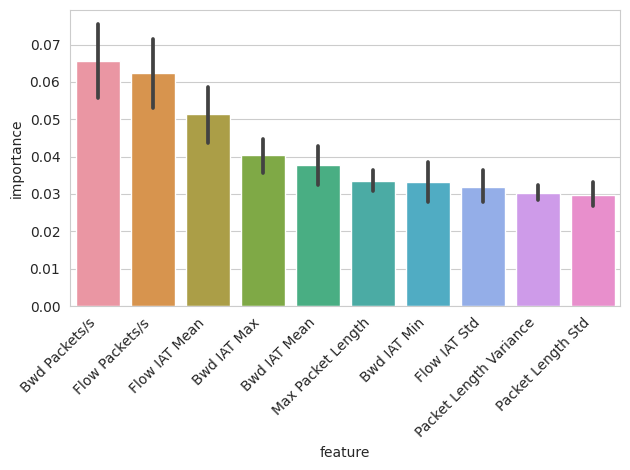

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("mako")
g = sns.barplot(
    data=df_top, x="feature", y="importance"
)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('/home/tosia/NASK/raporty/glrm/graph/features_rf')

In [52]:
df["importance"][0]

0.012443215967191052

In [53]:
df.sort_values("importance_mean", ascending=False).groupby("feature").head()

,trial,feature,importance,importance_mean
340,4,Bwd Packets/s,0.082806,0.065623
492,6,Bwd Packets/s,0.055997,0.065623
644,8,Bwd Packets/s,0.080292,0.065623
112,1,Bwd Packets/s,0.083459,0.065623
568,7,Bwd Packets/s,0.048187,0.065623
...,...,...,...,...
516,6,Bwd Avg Bulk Rate,0.000000,0.000000
515,6,Bwd Avg Packets/Bulk,0.000000,0.000000
513,6,Fwd Avg Bulk Rate,0.000000,0.000000
587,7,Fwd Avg Bytes/Bulk,0.000000,0.000000
